In [32]:
!pip3 install pandas-gbq -U
!pip3 install pandas
!pip3 install pandasql
!pip3 install google-cloud-bigquery --upgrade

  Using cached https://files.pythonhosted.org/packages/70/78/cd5ce606a487cf62e82784237599b332dbdf23a41aa237578d906a49bee1/pandas_gbq-0.9.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/d7/3d031f57e4117a564979835bbf1233244eb31960a46f38a9ad0fe078363b/pydata_google_auth-0.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8b/01/13758ff9b970008ccf9e0dcc3b86d0e01937d7485b9a2c6142c9c2bdb4da/google_api_core-1.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0c/f2/3c225e7a69cb27d283b68bff867722bd066bc1858611180197f711815ea5/google_cloud_core-0.29.1-py2.py3-none-any.whl
google-cloud-monitoring 0.28.0 has requirement google-api-core<0.2.0dev,>=0.1.1, but you'll have google-api-core 1.7.0 which is incompatible.
google-cloud-monitoring 0.28.0 has requirement google-cloud-core<0.29dev,>=0.28.0, but you'll have google-cloud-core 0.29.1 which is incompatible.
  Found existing installation: pandas-gbq 0.3.0
  

  Found existing installation: google-cloud-bigquery 1.8.1
    Uninstalling google-cloud-bigquery-1.8.1:
      Successfully uninstalled google-cloud-bigquery-1.8.1


In [113]:
import pandas as pd

df_orig = pd.read_csv("./data/CleanedData8.csv") 
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level
0,House,Le Plateau-Mont-Royal,9 Rooms 4+0 Bedrooms 3+0 Bathrooms/Powder ro...,1349000,45.526245,-73.576987,Two or more storey Detached,1905,1200.0,0,0,Basement 6 feet or +,7.92
1,Condo,Rosemont/La,5 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,349900,45.558416,-73.570714,Undivided,2014,NaN,0,0,NaN,3.05
2,Condo,Montréal-Nord,5 Rooms 1+0 Bedroom 1+1 Bathrooms/Powder roo...,239000,45.627271,-73.620190,Divided,1982,1075.0,0,1,Adapted for reduced mobility Elevator,2.15
3,House,Dollard-Des,10 Rooms 3+1 Bedrooms 2+1 Bathrooms/Powder r...,575000,45.491510,-73.791346,Split-level Detached,1970,6197.0,4,2,NaN,1.17
4,Condo,Ville-Marie,7 Rooms 3+0 Bedrooms 2+1 Bathrooms/Powder ro...,1975000,45.498350,-73.583058,Divided,1900,NaN,1,1,NaN,7.15


In [114]:
df_orig['htype'] = df_orig.Type.astype('category').cat.codes
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level,htype
0,House,Le Plateau-Mont-Royal,9 Rooms 4+0 Bedrooms 3+0 Bathrooms/Powder ro...,1349000,45.526245,-73.576987,Two or more storey Detached,1905,1200.0,0,0,Basement 6 feet or +,7.92,4
1,Condo,Rosemont/La,5 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,349900,45.558416,-73.570714,Undivided,2014,NaN,0,0,NaN,3.05,2
2,Condo,Montréal-Nord,5 Rooms 1+0 Bedroom 1+1 Bathrooms/Powder roo...,239000,45.627271,-73.620190,Divided,1982,1075.0,0,1,Adapted for reduced mobility Elevator,2.15,2
3,House,Dollard-Des,10 Rooms 3+1 Bedrooms 2+1 Bathrooms/Powder r...,575000,45.491510,-73.791346,Split-level Detached,1970,6197.0,4,2,NaN,1.17,4
4,Condo,Ville-Marie,7 Rooms 3+0 Bedrooms 2+1 Bathrooms/Powder ro...,1975000,45.498350,-73.583058,Divided,1900,NaN,1,1,NaN,7.15,2


In [115]:
df_orig['cityIndex'] = df_orig.City.astype('category').cat.codes
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level,htype,cityIndex
0,House,Le Plateau-Mont-Royal,9 Rooms 4+0 Bedrooms 3+0 Bathrooms/Powder ro...,1349000,45.526245,-73.576987,Two or more storey Detached,1905,1200.0,0,0,Basement 6 feet or +,7.92,4,13
1,Condo,Rosemont/La,5 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,349900,45.558416,-73.570714,Undivided,2014,NaN,0,0,NaN,3.05,2,23
2,Condo,Montréal-Nord,5 Rooms 1+0 Bedroom 1+1 Bathrooms/Powder roo...,239000,45.627271,-73.620190,Divided,1982,1075.0,0,1,Adapted for reduced mobility Elevator,2.15,2,17
3,House,Dollard-Des,10 Rooms 3+1 Bedrooms 2+1 Bathrooms/Powder r...,575000,45.491510,-73.791346,Split-level Detached,1970,6197.0,4,2,NaN,1.17,4,6
4,Condo,Ville-Marie,7 Rooms 3+0 Bedrooms 2+1 Bathrooms/Powder ro...,1975000,45.498350,-73.583058,Divided,1900,NaN,1,1,NaN,7.15,2,29


In [116]:
df_orig['subtype'] = df_orig.Type.astype('category').cat.codes
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level,htype,cityIndex,subtype
0,House,Le Plateau-Mont-Royal,9 Rooms 4+0 Bedrooms 3+0 Bathrooms/Powder ro...,1349000,45.526245,-73.576987,Two or more storey Detached,1905,1200.0,0,0,Basement 6 feet or +,7.92,4,13,4
1,Condo,Rosemont/La,5 Rooms 2+0 Bedrooms 1+0 Bathroom/Powder room,349900,45.558416,-73.570714,Undivided,2014,NaN,0,0,NaN,3.05,2,23,2
2,Condo,Montréal-Nord,5 Rooms 1+0 Bedroom 1+1 Bathrooms/Powder roo...,239000,45.627271,-73.620190,Divided,1982,1075.0,0,1,Adapted for reduced mobility Elevator,2.15,2,17,2
3,House,Dollard-Des,10 Rooms 3+1 Bedrooms 2+1 Bathrooms/Powder r...,575000,45.491510,-73.791346,Split-level Detached,1970,6197.0,4,2,NaN,1.17,4,6,4
4,Condo,Ville-Marie,7 Rooms 3+0 Bedrooms 2+1 Bathrooms/Powder ro...,1975000,45.498350,-73.583058,Divided,1900,NaN,1,1,NaN,7.15,2,29,2


In [117]:
df_orig = df_orig.dropna()
#filter = df_orig["Rooms"].apply(lambda x: x.strip() != "")
#df_orig = df_orig[filter]
df_orig[col_room] = df_orig['Rooms'].apply(lambda x: int(x.find(" Rooms")) if (x.strip() != "") else -1)
df_orig = df_orig[df_orig["Rooms"] != -1]
df_orig.head(n=5)

,Type,City,Rooms,Price,lat,lng,type,year,lot size,Driveway,Garage,Basement,Risk Level,htype,cityIndex,subtype
0,House,Le Plateau-Mont-Royal,1,1349000,45.526245,-73.576987,Two or more storey Detached,1905,1200.0,0,0,Basement 6 feet or +,7.92,4,13,4
2,Condo,Montréal-Nord,1,239000,45.627271,-73.620190,Divided,1982,1075.0,0,1,Adapted for reduced mobility Elevator,2.15,2,17,2
5,House,Outremont,2,1689000,45.514375,-73.616657,Two or more storey Semi-detached,1921,3750.0,2,1,Basement 6 feet or +,2.16,4,19,4
8,House,Saint-Laurent,2,1075000,45.513894,-73.713583,Two or more storey Attached,2013,1857.0,0,2,Basement 6 feet or +,0.54,4,24,4
12,Condo,Ahuntsic-Cartierville,2,379000,45.565330,-73.645639,Divided,2014,1309.0,0,0,Elevator,2.38,2,0,2


In [118]:
df_input = df_orig.drop(['Type', 'type', 'City', 'lat', 'lng', 'Basement'], axis=1)
df_input.head(n=5)

,Rooms,Price,year,lot size,Driveway,Garage,Risk Level,htype,cityIndex,subtype
0,1,1349000,1905,1200.0,0,0,7.92,4,13,4
2,1,239000,1982,1075.0,0,1,2.15,2,17,2
5,2,1689000,1921,3750.0,2,1,2.16,4,19,4
8,2,1075000,2013,1857.0,0,2,0.54,4,24,4
12,2,379000,2014,1309.0,0,0,2.38,2,0,2


In [119]:
df_input1 = df_input.dropna()
df_input1.head(n=5)

,Rooms,Price,year,lot size,Driveway,Garage,Risk Level,htype,cityIndex,subtype
0,1,1349000,1905,1200.0,0,0,7.92,4,13,4
2,1,239000,1982,1075.0,0,1,2.15,2,17,2
5,2,1689000,1921,3750.0,2,1,2.16,4,19,4
8,2,1075000,2013,1857.0,0,2,0.54,4,24,4
12,2,379000,2014,1309.0,0,0,2.38,2,0,2


In [26]:
#cols_to_norm = ['Price']
#df_input1[cols_to_norm] = df_input1[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#df_input1.head(n=5)

In [121]:
X = df_input1.drop(['Risk Level'], axis=1)
y = df_input1['Risk Level']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test.shape

(858, 9)

In [123]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [124]:
y_pred = regressor.predict(X_test) 
resultDF=pd.DataFrame({'Actual Risk Level':y_test, 'Predicted Risk Level':y_pred})  
resultDF.head(10)
X_test.join(resultDF).head(20)

,Rooms,Price,year,lot size,Driveway,Garage,htype,cityIndex,subtype,Actual Risk Level,Predicted Risk Level
5388,1,499900,1983,1079.0,0,1,2,29,2,4.90,5.75
4820,1,319000,1994,935.0,0,1,2,28,2,0.99,1.08
82,1,1790000,1952,10200.0,4,1,4,15,4,1.59,1.59
1248,1,535800,1999,1262.0,0,1,7,23,7,2.80,1.87
726,1,388000,2005,575.0,0,1,2,29,2,8.36,5.48
3294,1,2150000,1993,2300.0,0,2,2,29,2,3.47,0.49
1112,1,649000,1999,2199.0,0,2,4,23,4,2.86,1.87
6530,1,528000,1991,6782.0,4,2,4,20,4,0.37,0.70
3966,2,1198000,2010,17432.0,2,2,4,10,4,0.20,0.00
670,2,1695000,1962,5857.0,2,2,4,8,4,1.44,1.51


In [125]:
from sklearn import metrics 
import numpy as np
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 1.0598018648018606
Mean Squared Error: 3.438400349650309
Root Mean Squared Error: 1.8542924121212137
R2_score:  0.5631609010975651


In [35]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#cm

In [126]:
important_features_dict = {}
for x,i in enumerate(regressor.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: %s' %important_features_list)

Most important features: [7, 3, 2, 1, 4, 5, 6, 8, 0]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


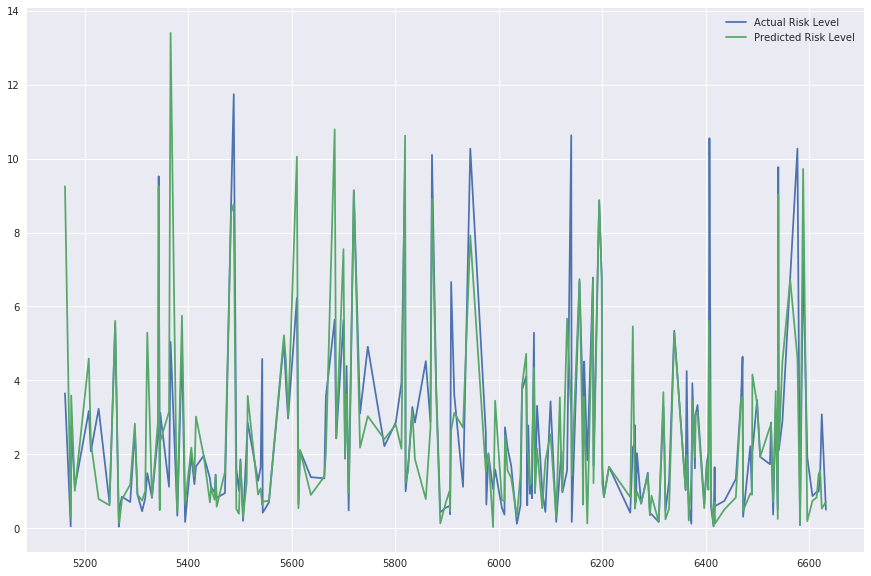

In [127]:
resultDF.sort_index()[-200:].plot(figsize=(15,10))

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


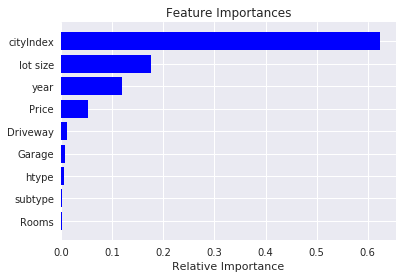

In [128]:
import matplotlib.pyplot as plt

features = ["Rooms", "Price", "year", "lot size", "Driveway", "Garage", "htype", "cityIndex", "subtype"]
importances = regressor.feature_importances_
indices = np.argsort(importances)

%matplotlib inline 

#plt.figure()
#plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],
#       color="r", yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
#plt.xlim([-1, X.shape[1]])
#plt.show()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()